# Q1
1) Delivery_time -> Predict delivery time using sorting time.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
#importing the liarary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

### Load the data

In [3]:
#importing dataset
DTST=pd.read_csv('delivery_time.csv')

In [4]:
DTST.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
DTST.shape

(21, 2)

In [6]:
#this gives discriptive statistics
DTST.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# EDA and Data visualization

In [7]:
DTST.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
DTST1 = DTST.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
DTST1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
DTST1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

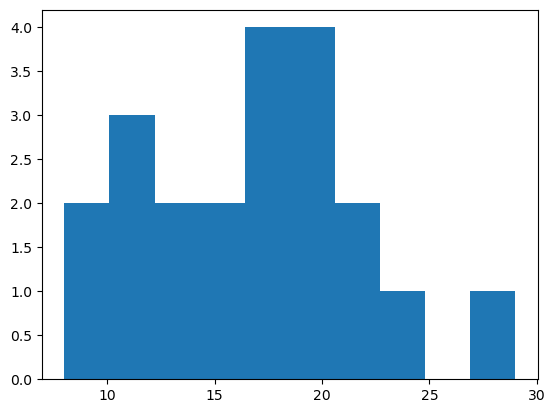

In [10]:
plt.hist(DTST1['Delivery_Time'])

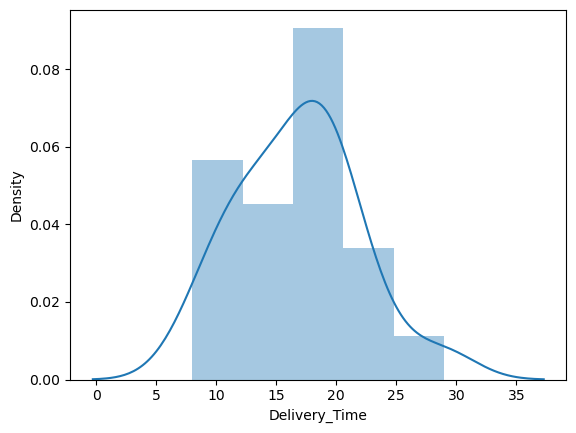

In [11]:
sns.distplot(DTST1.Delivery_Time)
plt.show()

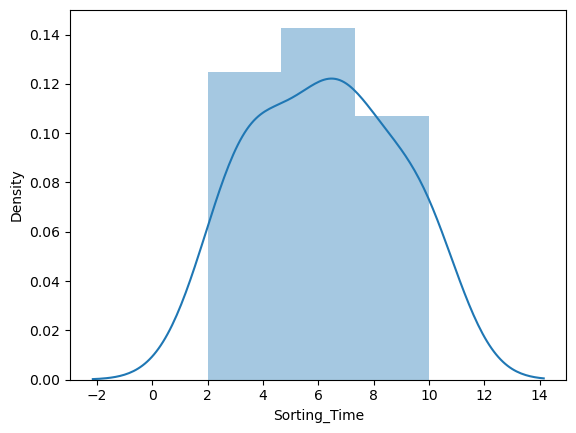

In [12]:
sns.distplot(DTST1.Sorting_Time)
plt.show()

<Axes: >

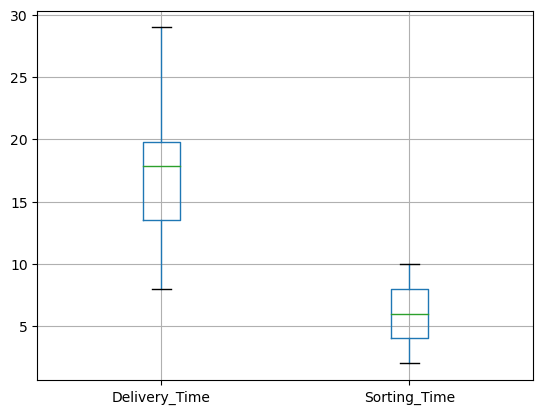

In [13]:
DTST1.boxplot()

In [14]:
#following the regression equationn, the depend variable (y) is the sorting time
y = DTST1 ['Delivery_Time']
#similar, our independent variable (x1) is delivery time
x1 = DTST1 ['Sorting_Time']

In [15]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64

In [16]:
x1

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting_Time, dtype: int64

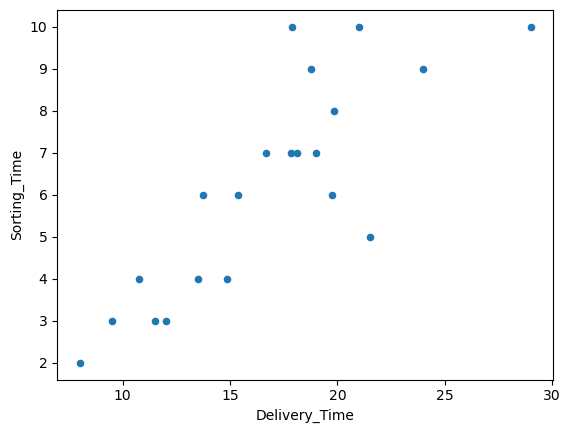

In [17]:
DTST1.plot('Delivery_Time', 'Sorting_Time' , kind = 'scatter')
plt.show()

## Model Building

In [18]:
R = smf.ols('y~x1', data = DTST1)
R1= R.fit()
R1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        21:37:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x1             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
log_model = smf.ols('np.log(Delivery_Time)~np.log(Sorting_Time)',data=DTST1).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Mon, 05 Jun 2023   Prob (F-statistic):           1.60e-07
Time:                           21:37:08   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model testing

In [20]:
#by these two test(params and pvalues) we prove that "Sorting_Time" is the best feature

In [21]:
R1.params

Intercept    6.582734
x1           1.649020
dtype: float64

In [22]:
#to get best feature for prediction we use pvalue 

In [23]:
RP =R1.pvalues
print('p_values:\n',RP)

p_values:
 Intercept    0.001147
x1           0.000004
dtype: float64


In [24]:
RT= R1.tvalues
print('T_values:\n',RT)

T_values:
 Intercept    3.823349
x1           6.387447
dtype: float64


In [25]:
R1.rsquared,R1.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

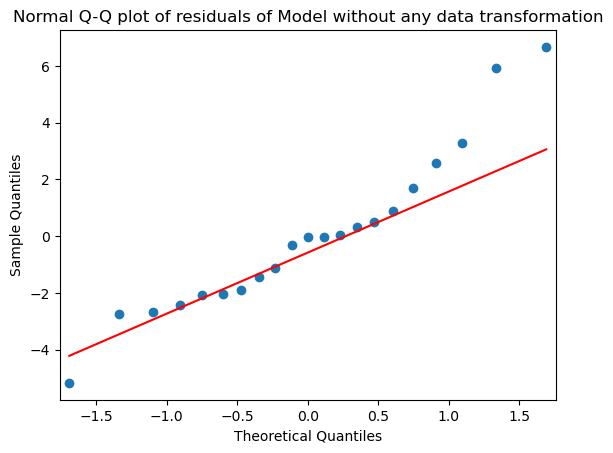

In [26]:
import statsmodels.api as sm
sm.qqplot(R1.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

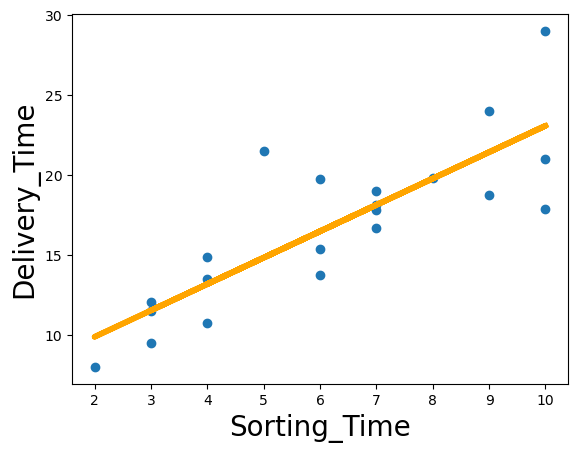

In [27]:
# Create a scatter plot
plt.scatter(DTST1['Sorting_Time'],y)
# Define the regression equation, so we can plot it later , yhat = beta0 * data od x1 + 
yhat = 1.6490*DTST1['Sorting_Time'] + 6.5827
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(DTST1['Sorting_Time'],yhat, lw=4, c='orange', label ='regression line')
# Label the axes
plt.xlabel('Sorting_Time', fontsize = 20)
plt.ylabel('Delivery_Time', fontsize = 20)
plt.show()

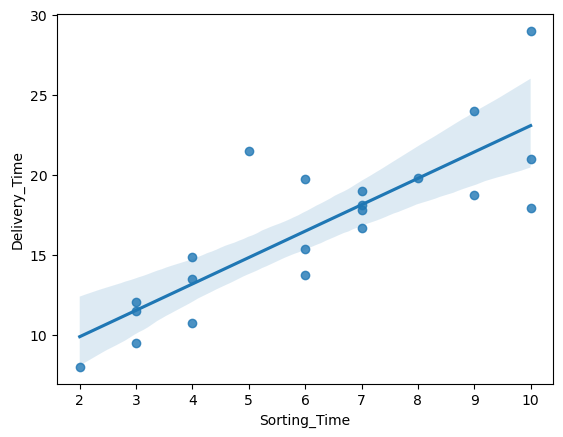

In [28]:
sns.regplot(x=DTST1['Sorting_Time'],y=DTST1['Delivery_Time'])
plt.show()

In [29]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery_Time, dtype: float64

In [30]:
pd.Series({'Sorting_Time':10})

Sorting_Time    10
dtype: int64

In [31]:
R1.predict(pd.Series({'x1':10}))

0    23.072933
dtype: float64

# Model Prediction

In [32]:
from sklearn.metrics import mean_squared_error

Predicting values from Model with Log Transformation on the Data

In [33]:
log_model_pred_y =np.exp(log_model.predict(DTST1['Sorting_Time']))

In [34]:
log__rmse =np.sqrt(mean_squared_error(DTST1['Delivery_Time'], log_model_pred_y))

In [35]:
print('model=', np.sqrt(R1.mse_resid),'\n' 'log_model=', log__rmse)


model= 2.9349037688901394 
log_model= 2.7458288976145493


In [86]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = DTST1.Sorting_Time
predicted['Delivery_Time'] = DTST1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(log_model.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


# Q2
2) Salary_hike -> Build a prediction model for Salary_hike.

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [37]:
# impoorting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [38]:
#loading the dataset
sal=pd.read_csv('Salary_Data.csv')

In [39]:
sal.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [40]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [41]:
sal.shape

(30, 2)

# EDA and Data visualization

In [42]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [43]:
#Checking for Null Values
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [44]:
#Checking for Duplicate Values
sal[sal.duplicated()].shape

(0, 2)

In [45]:
sal[sal.duplicated()]

,YearsExperience,Salary


No duplicate values.


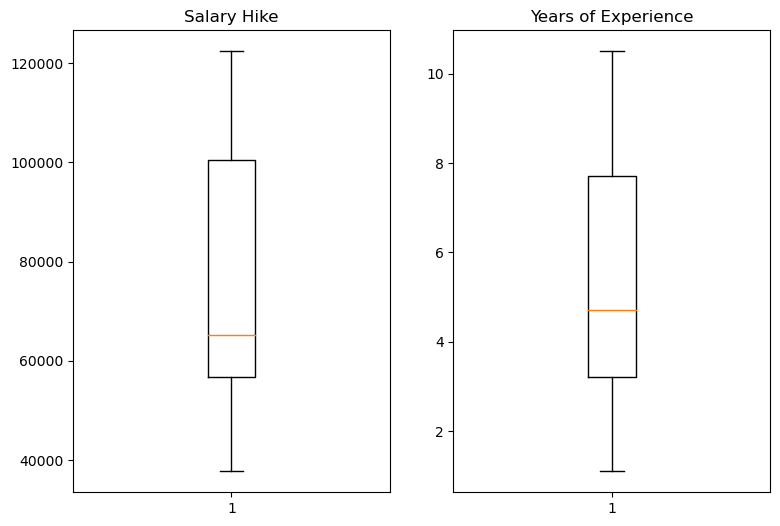

median of years of experience is : 4.700000 
median of salary hike is : 65237.000000


In [46]:
#boxplot to check the data distribution and outliers

plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(sal['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(sal['YearsExperience'])
plt.title('Years of Experience')
plt.show()
print('median of years of experience is : 4.700000','\nmedian of salary hike is : 65237.000000')

<Axes: xlabel='YearsExperience', ylabel='Density'>

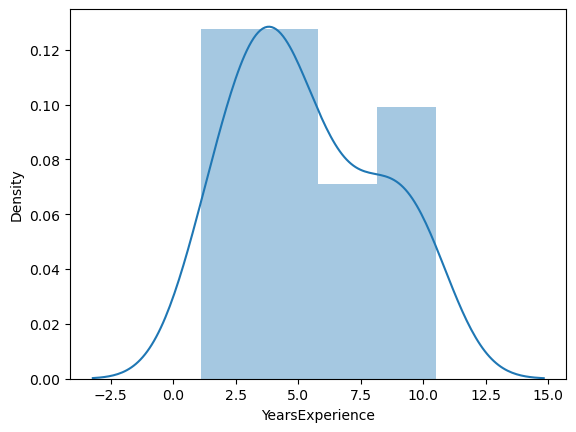

In [48]:
#distplot to see the data distribution
sns.distplot(sal['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

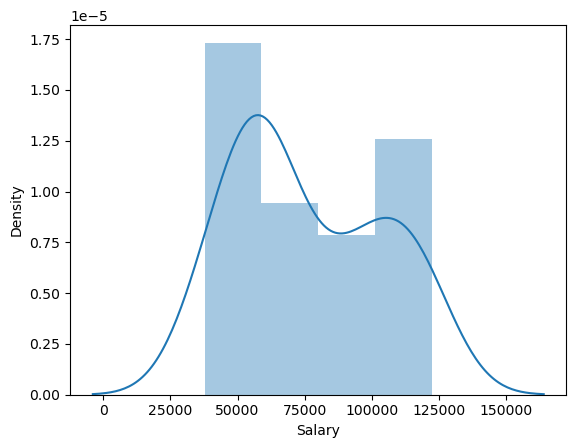

In [49]:
#distplot to see the data distribution
sns.distplot(sal['Salary'])

In [50]:
#checking the correlation between variables
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


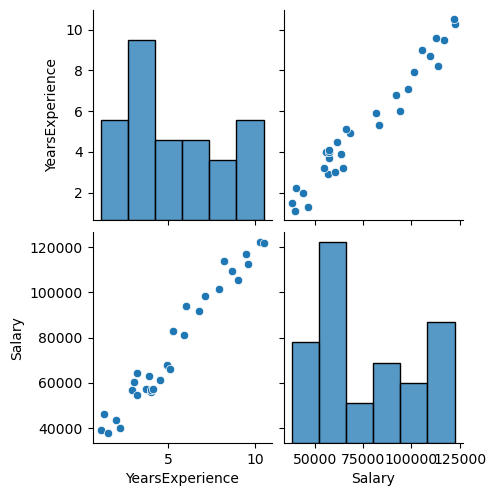

In [79]:
#pairplot
sns.pairplot(sal)

there is positive correlation between salary and yearsofexperience

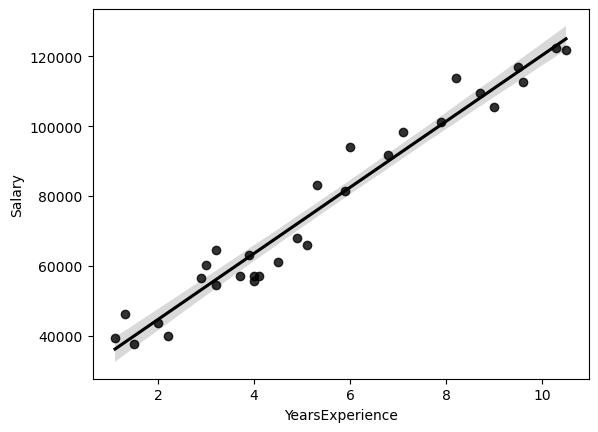

In [78]:
#regression plot
sns.regplot(x=sal['YearsExperience'],y=sal['Salary'], color= 'black')
plt.show()

In [52]:
#Assumption of normality
sal.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

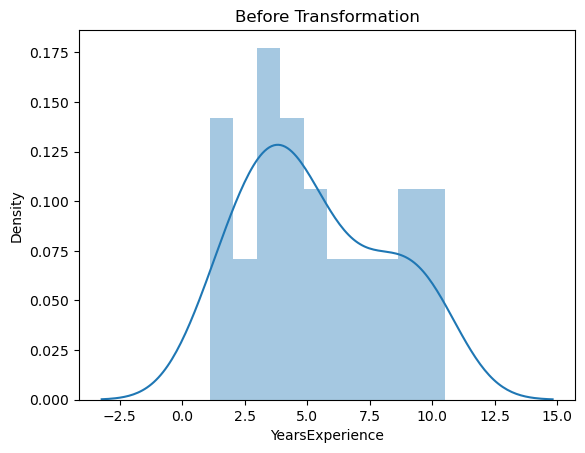

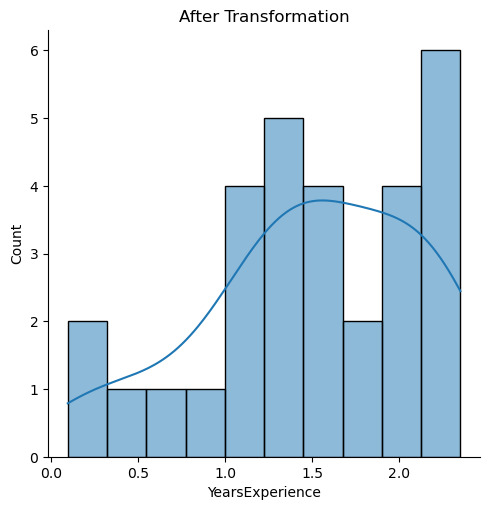

In [53]:
sns.distplot(sal['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(sal['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

### Fitting a Linear Regression Model

In [54]:
import statsmodels.formula.api as smf
mod = smf.ols("Salary~YearsExperience",data=sal).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        21:37:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
mod1 = smf.ols("Salary~np.log(YearsExperience)",data=sal).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           3.25e-13
Time:                        21:37:17   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
mod2=smf.ols("Salary~np.exp(YearsExperience)",data=sal).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Mon, 05 Jun 2023   Prob (F-statistic):           2.72e-05
Time:                        21:37:17   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(YearsExperience)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model testing 

In [57]:
#testing 1st model
##Finding Coefficient Parameters
mod.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [58]:
print(mod.tvalues,'\n',mod.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [59]:
#finding rsquared values
mod.rsquared,mod.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [60]:
#testing 2nd model
##Finding Coefficient Parameters
mod1.params

Intercept                  14927.97177
np.log(YearsExperience)    40581.98796
dtype: float64

In [61]:
print(mod1.tvalues,'\n',mod1.pvalues)

Intercept                   2.895135
np.log(YearsExperience)    12.791989
dtype: float64 
 Intercept                  7.268813e-03
np.log(YearsExperience)    3.250155e-13
dtype: float64


In [62]:
#finding rsquared values
mod1.rsquared,mod1.rsquared_adj

(0.853888882875697, 0.8486706286926862)

In [63]:
#testing 3rd model
##Finding Coefficient Parameters
mod2.params

Intercept                  67568.624969
np.exp(YearsExperience)        2.136040
dtype: float64

In [64]:
print(mod2.tvalues,'\n',mod2.pvalues)

Intercept                  16.620427
np.exp(YearsExperience)     5.006889
dtype: float64 
 Intercept                  4.888835e-16
np.exp(YearsExperience)    2.721588e-05
dtype: float64


In [65]:
#finding rsquared values
mod2.rsquared,mod2.rsquared_adj

(0.47238440560728734, 0.45354099152183325)

### model testng with scatter plot

In [66]:
#1st model
pred=mod.predict(sal)

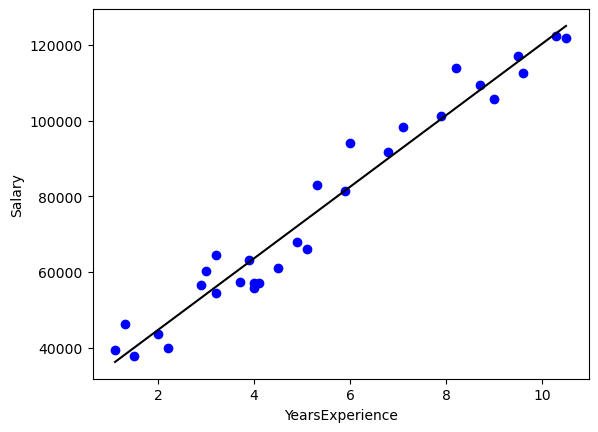

In [67]:
plt.scatter(x=sal.YearsExperience, y=sal.Salary, color='blue')
plt.plot(sal.YearsExperience, pred,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [68]:
#2nd model
pred1=mod1.predict(sal)

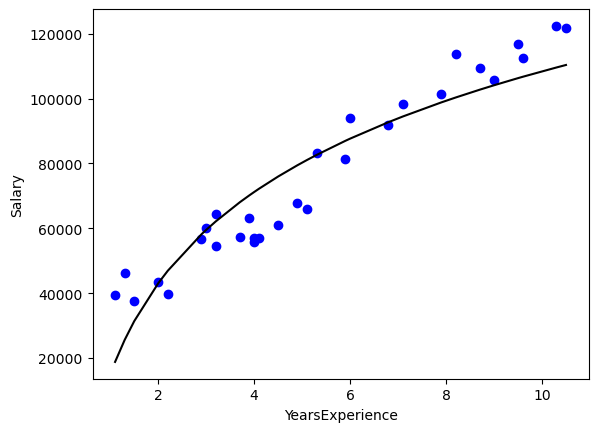

In [69]:
plt.scatter(x=sal.YearsExperience, y=sal.Salary, color='blue')
plt.plot(sal.YearsExperience, pred1,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [70]:
#3rd model
pred2=mod2.predict(sal)

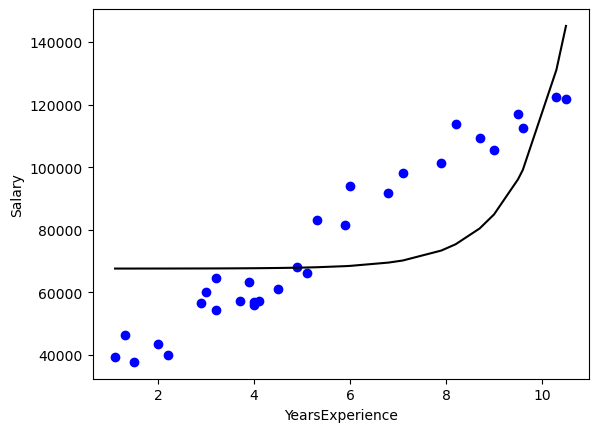

In [71]:
plt.scatter(x=sal.YearsExperience, y=sal.Salary, color='blue')
plt.plot(sal.YearsExperience, pred2,color='black')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

## model validation

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
mod1_pred_y = np.square(mod1.predict(sal['YearsExperience']))

In [74]:
mod2_pred_y = np.square(mod2.predict(sal['YearsExperience']))

In [75]:
mod1_rmse =np.sqrt(mean_squared_error(sal['Salary'], mod1_pred_y))
mod2_rmse =np.sqrt(mean_squared_error(sal['Salary'], mod2_pred_y))
print('mod=', np.sqrt(mod.mse_resid),'\n' 'mod1=', mod1_rmse,'\n' 'mod2=',mod2_rmse)

mod= 5788.315051119395 
mod1= 7292304757.139566 
mod2= 7175337641.703006


In [76]:
rmse = {'mod': np.sqrt(mod.mse_resid), 'mod1': mod1_rmse, 'mod2': mod2_rmse}
min(rmse, key=rmse.get)

'mod'

out of all 3 models, 1st model is best for prediction.

## predicting value

In [88]:
# first model results without any transformation
predicted1 = pd.DataFrame()
predicted1['YearsExperience'] = sal.YearsExperience
predicted1['Salary'] = sal.Salary
predicted1['Predicted_Salary_Hike'] = pd.DataFrame(mod.predict(predicted1.YearsExperience))
predicted1

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
